## Bayesian analysis of the positions taken by F1 drivers in each race of the 2022-2024 hybrid era.
### Andrzej Janik, Łukasz Gakan
### Data Analytics 2024
### Automatic Control and Robotics - Computer Science in Control and Management

## 1. Project formulation
The goal of the project is to conduct a Bayesian analysis of the places held by Formula One drivers in individual races in the hybrid era, spanning 2022-2024. The hybrid era, characterized by advanced hybrid powertrain technologies, has introduced new challenges and opportunities that significantly affect race results and team strategies. The analysis aims to identify patterns and factors affecting driver performance in this modern era, using Bayesian analysis tools. The project will collect and analyze data on the results of F1 races from 2022-2024, including drivers' starting and finishing positions, weather conditions, times and finishing positions from other sessions i.e qualifications, sprint qualifications, free practices. 

### 1.1. Point of creating model and potential use cases
Bayesian analysis will make it possible to model the relationship between these variables, identifying the key factors affecting drivers' final positions and to predict future results based on current data. This will enable better preparation of teams for future races, as well as a better understanding of the dynamics of competition in the hybrid era of Formula One. The analysis results can be utilized for educating new team members and drivers, helping them better understand the factors affecting their performance and to develop more effective strategies for upcoming races. Outcome can be highly useful for people involved in betting, as it can predict the positions of drivers with greater accuracy, thereby increasing the chances of winning bets. The last use case is that FIA (The Fédération Internationale de l'Automobile) can leverage the model to evaluate the impact of new technical regulations. This can help enhance the overall spectacle for fans by ensuring closer and more exciting races.

### 1.2. Description of data
The data for all sessions from the hybrid era (seasons 2022, 2023, 2024) were scraped from the official Formula 1 website (https://www.formula1.com), and the weather data were obtained using the FastF1 API. After that, the data from each race weekend were appropriately merged and sorted.
Below is the representation of all columns in the prepared dataset:

1. **Year**: The year in which the race took place.
2. **Race**: The name or location of the race.
3. **No**: The car number of the driver.
4. **Driver**: The name of the driver.
5. **Car**: The team or manufacturer of the car.
6. **Pos (race)**: The final position of the driver in the race.
7. **Laps (race)**: The number of laps completed by the driver in the race.
8. **Time/Retired**: The race completion time of the driver or the reason for retirement if the driver did not finish the race.
9. **Points**: The points awarded to the driver for the race.
10. **Pos (qualifying)**: The position of the driver in the qualifying session.
11. **Q1**: The time of the driver in the first qualifying session.
12. **Q2**: The time of the driver in the second qualifying session.
13. **Q3**: The time of the driver in the third qualifying session.
14. **Pos (FP1)**: The position of the driver in the first free practice session.
15. **Time (FP1)**: The time of the driver in the first free practice session.
16. **Gap (FP1)**: The time gap between the driver and the fastest driver in the first free practice session.
17. **Laps (FP1)**: The number of laps completed by the driver in the first free practice session.
18. **Pos (FP2)**: The position of the driver in the second free practice session.
19. **Time (FP2)**: The time of the driver in the second free practice session.
20. **Gap (FP2)**: The time gap between the driver and the fastest driver in the second free practice session.
21. **Laps (FP2)**: The number of laps completed by the driver in the second free practice session.
22. **Pos (FP3)**: The position of the driver in the third free practice session.
23. **Time (FP3)**: The time of the driver in the third free practice session.
24. **Gap (FP3)**: The time gap between the driver and the fastest driver in the third free practice session.
25. **Laps (FP3)**: The number of laps completed by the driver in the third free practice session.
26. **Pos (Sprint)**: The position of the driver in the sprint race (if sprint weekend).
27. **Laps (Sprint)**: The number of laps completed by the driver in the sprint race (if sprint weekend).
28. **Time/Retired (Sprint)**: The sprint race completion time of the driver or the reason for retirement if the driver did not finish the sprint race (if sprint weekend).
29. **Points (Sprint)**: The points awarded to the driver for the sprint race (if sprint weekend).
30. **Pos (Sprint Quali)**: The position of the driver in the sprint qualifying session (if sprint weekend).
31. **SQ1**: The time of the driver in the first sprint qualifying session (if sprint weekend).
32. **SQ2**: The time of the driver in the second sprint qualifying session (if sprint weekend).
33. **SQ3**: The time of the driver in the third sprint qualifying session (if asprint weekend).
34. **Laps (Sprint Quali)**: The number of laps completed by the driver in the sprint qualifying session (if sprint weekend).
35. **AvgAirTemp**: The average air temperature during the race.
36. **AvgHumidity**: The average humidity during the race.
37. **AvgPressure**: The average atmospheric pressure during the race.
38. **TotalRainfall**: The total rainfall during the race.
39. **AvgTrackTemp**: The average track temperature during the race.
40. **AvgWindDirection**: The average wind direction during the race.
41. **AvgWindSpeed**: The average wind speed during the race.

### 1.3. DAG
To visualize the relationships between the variables, we use a Directed Acyclic Graph (DAG):

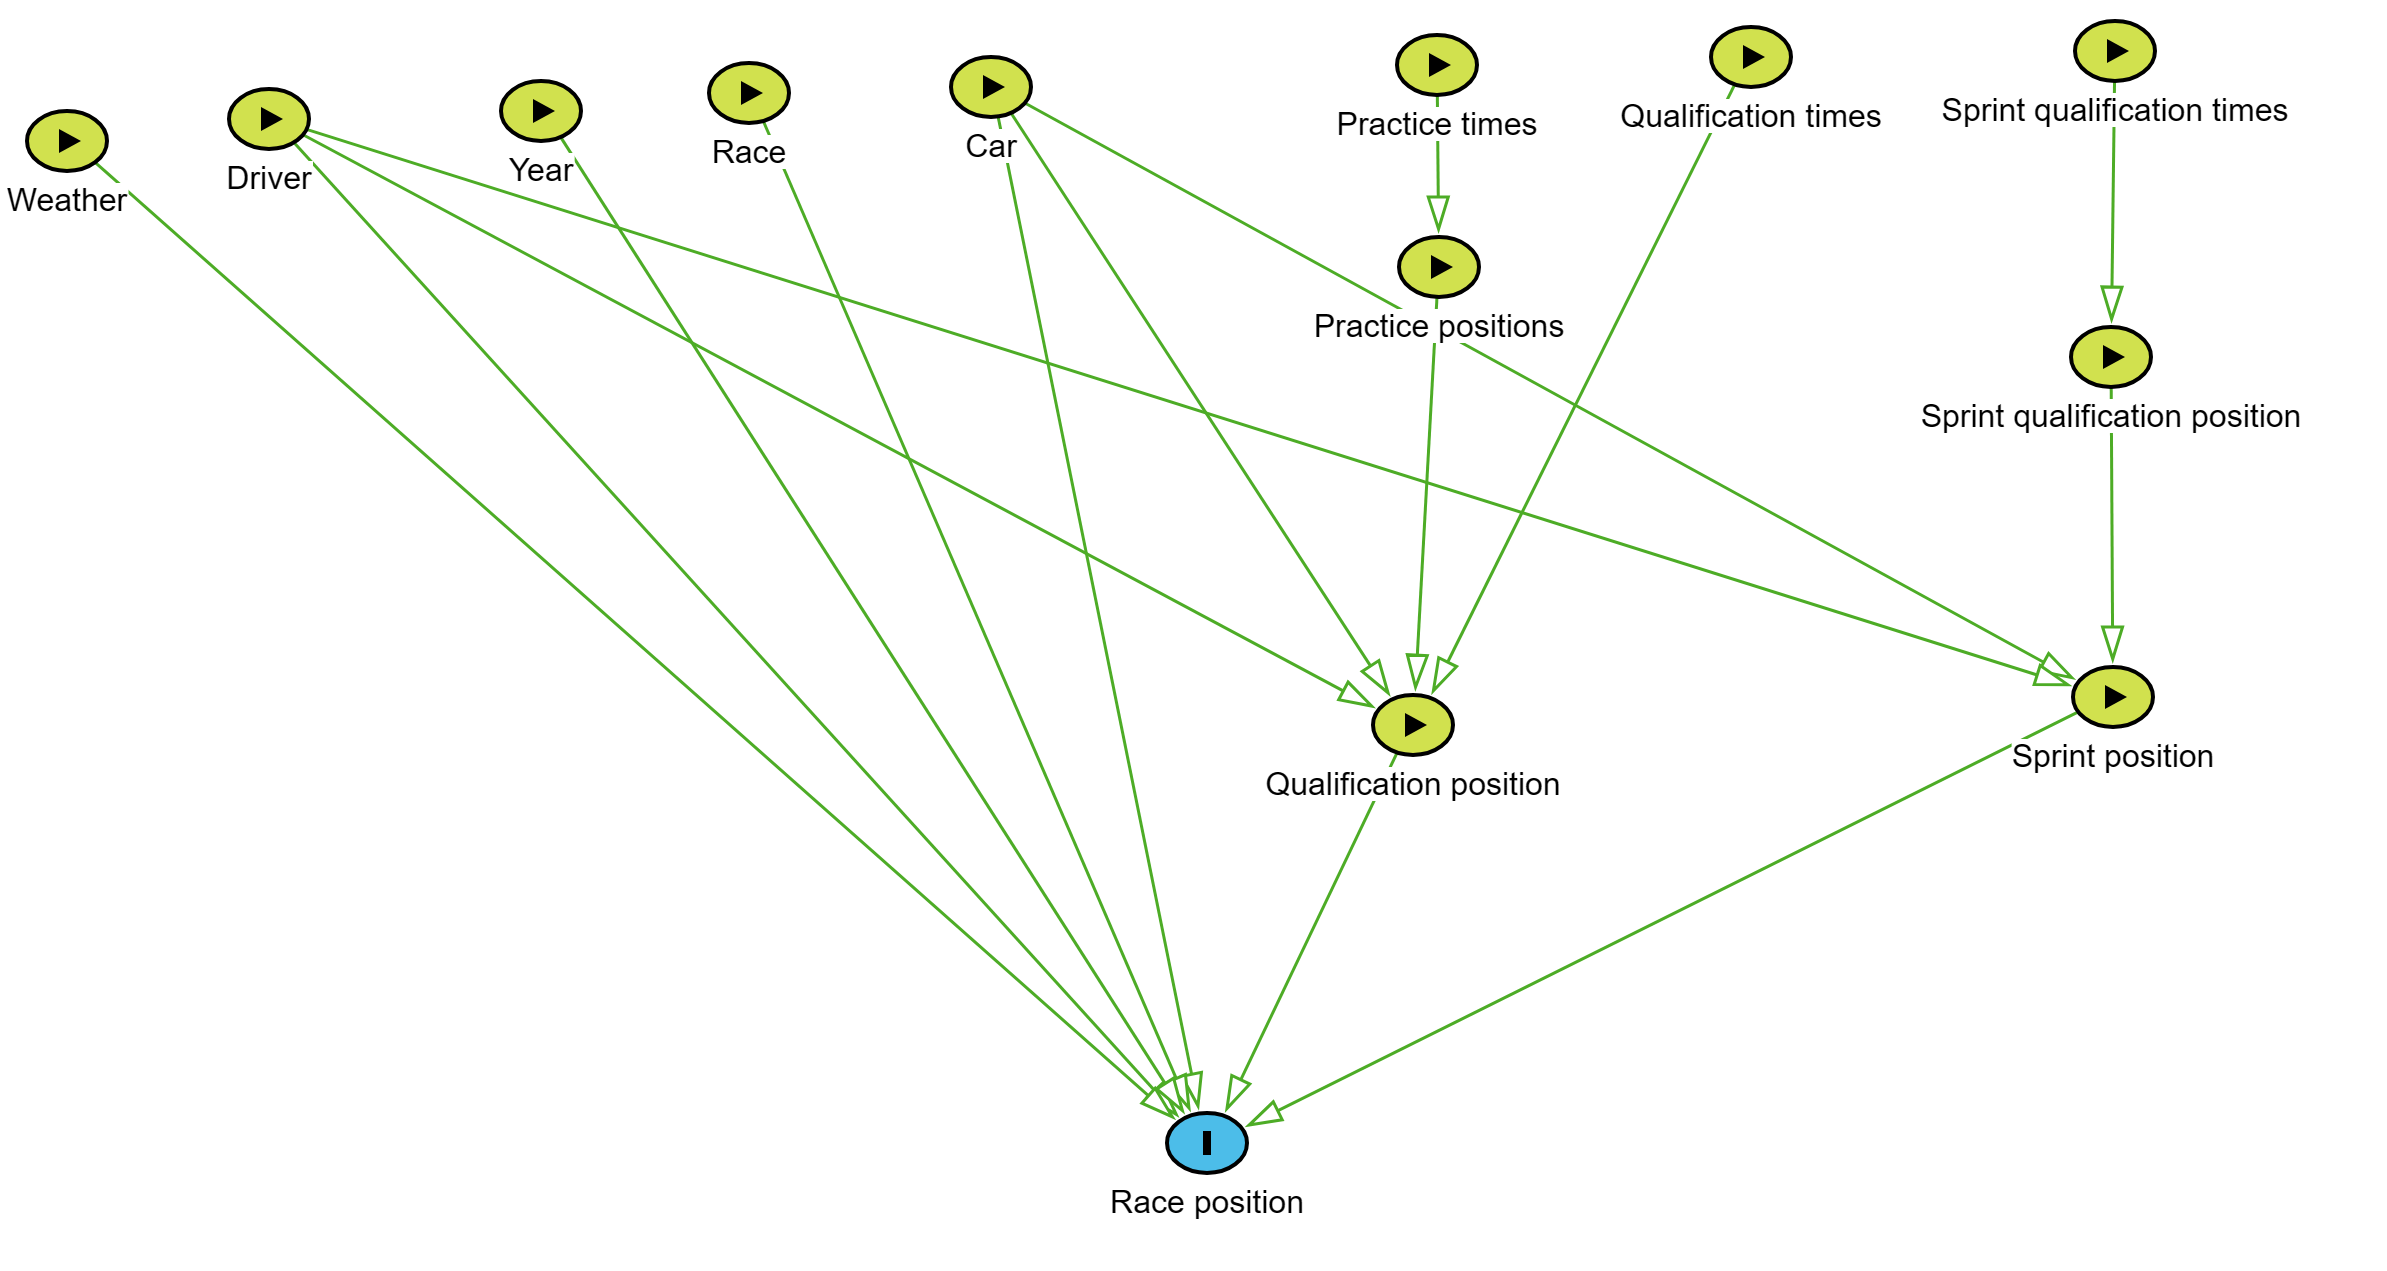

In [14]:
from PIL import Image
from IPython.display import display

DAG = Image.open('DAG.png')
display(DAG)

##### Confoundings
1. **Pipes**:
<br>Weather -> Race position,
<br>Driver -> Race position,
<br>Driver -> Qualification position -> Race position,
<br>Driver -> Sprint position -> Race position,
<br>Year -> Race position,
<br>Race -> Race position,
<br>Car -> Race position,
<br>Car -> Qualification position -> Race position,
<br>Car -> Sprint position -> Race position,
<br>Practice times -> Practice positions -> Qualification position -> Race position,
<br>Qualification times -> Qualification position,
<br>Sprint qualification times -> Sprint qualification position -> Race position.

2. **Forks**:
<br>Driver cause changes in Race position, Qualification position and Sprint position,
<br>Car cause changes in Race position, Qualification position and Sprint position.

3. **Colliders**:
<br>Qualification position and Sprint position cause changes in Race position which is our outcome of analysis.

## 2. Data Preprocessing

In [34]:
import pandas as pd
import numpy as np
import re

In [35]:
original_data = pd.read_csv('final_f1_data.csv')
original_data.head()

,Year,Race,No,Driver,Car,Pos (race),Laps (race),Time/Retired,Points,Pos (qualifying),...,SQ2,SQ3,Laps (Sprint Quali),AvgAirTemp,AvgHumidity,AvgPressure,TotalRainfall,AvgTrackTemp,AvgWindDirection,AvgWindSpeed
0,2022,Bahrain,16,Charles Leclerc LEC,Ferrari,1,57.0,1:37:33:584,26.0,1,...,NaN,NaN,NaN,23.62,29.49,1010.39,0,28.61,124.43,0.3
1,2022,Bahrain,10,Pierre Gasly GAS,AlphaTauri RBPT,NC,44.0,DNF,0.0,10,...,NaN,NaN,NaN,23.62,29.49,1010.39,0,28.61,124.43,0.3
2,2022,Bahrain,1,Max Verstappen VER,Red Bull Racing RBPT,19,54.0,DNF,0.0,2,...,NaN,NaN,NaN,23.62,29.49,1010.39,0,28.61,124.43,0.3
3,2022,Bahrain,11,Sergio Perez PER,Red Bull Racing RBPT,18,56.0,DNF,0.0,4,...,NaN,NaN,NaN,23.62,29.49,1010.39,0,28.61,124.43,0.3
4,2022,Bahrain,27,Nico Hulkenberg HUL,Aston Martin Aramco Mercedes,17,57.0,+63.829s,0.0,17,...,NaN,NaN,NaN,23.62,29.49,1010.39,0,28.61,124.43,0.3


In [36]:
original_data.describe()

,Year,No,Laps (race),Points,Pos (FP1),Laps (FP1),Pos (FP2),Laps (FP2),Pos (FP3),Laps (FP3),Laps (Sprint),Points (Sprint),Laps (Sprint Quali),AvgAirTemp,AvgHumidity,AvgPressure,TotalRainfall,AvgTrackTemp,AvgWindDirection,AvgWindSpeed
count,1048.000000,1048.000000,998.000000,998.000000,996.000000,996.000000,805.000000,805.000000,777.000000,777.000000,219.000000,219.000000,160.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2022.669847,27.684160,54.092184,5.105210,10.464859,21.462851,10.350311,25.371429,10.463320,18.615187,19.150685,1.808219,12.050000,24.150658,52.957653,987.579284,10.746183,35.564170,182.211422,1.888263
std,0.674099,23.115599,16.418655,7.259757,5.753720,7.594340,5.710601,7.053627,5.750751,4.703577,5.292381,2.647437,4.821075,4.787239,17.095960,52.604867,38.036584,8.090855,61.259309,1.018147
min,2022.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,12.900000,7.110000,779.520000,0.000000,17.420000,87.800000,0.300000
25%,2022.000000,11.000000,50.000000,0.000000,5.000000,19.000000,5.000000,22.000000,5.000000,16.000000,19.000000,0.000000,8.000000,20.460000,42.320000,991.200000,0.000000,30.140000,132.640000,1.260000
50%,2023.000000,22.000000,57.000000,1.000000,10.000000,23.000000,10.000000,26.000000,10.000000,19.000000,19.000000,0.000000,12.000000,24.860000,54.160000,1008.650000,0.000000,35.520000,173.240000,1.530000
75%,2023.000000,44.000000,65.000000,9.750000,15.000000,26.000000,15.000000,30.000000,15.000000,22.000000,24.000000,3.500000,15.000000,27.505000,63.080000,1012.930000,0.000000,41.690000,220.330000,2.270000
max,2024.000000,99.000000,78.000000,26.000000,20.000000,39.000000,20.000000,44.000000,20.000000,31.000000,24.000000,8.000000,24.000000,36.570000,87.450000,1020.600000,250.000000,54.460000,314.130000,5.490000


In [37]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1048 non-null   int64  
 1   Race                   1048 non-null   object 
 2   No                     1048 non-null   int64  
 3   Driver                 1048 non-null   object 
 4   Car                    1048 non-null   object 
 5   Pos (race)             998 non-null    object 
 6   Laps (race)            998 non-null    float64
 7   Time/Retired           998 non-null    object 
 8   Points                 998 non-null    float64
 9   Pos (qualifying)       998 non-null    object 
 10  Q1                     998 non-null    object 
 11  Q2                     744 non-null    object 
 12  Q3                     494 non-null    object 
 13  Pos (FP1)              996 non-null    float64
 14  Time (FP1)             959 non-null    object 
 15  Gap 

## 2. Preprocessing of the combined data used in the models will proceed as follows: 

1. Selecting relevant and useful columns: `Year`, `Race`, `No`, `Driver`, `Car`, `Pos (race)`, `Points`, `AvgAirTemp`, `AvgHumidity`, `AvgPressure`, `TotalRainfall`, `AvgTrackTemp`, `AvgWindDirection`, `AvgWindSpeed`
2. Data Cleaning: Replacing "NC" and "DQ" Values in the `Pos (race)` column with the Last possible position
3. Choosing drivers who participated in each of the years considered.
4. Calculating the driver's power coefficient\
The driver skill rating $R_d$ is determined by the following formula:
$$
R_d = \frac{W_d \cdot P_d + Q_d \cdot A_d + C_d \cdot S_d}{3}
$$
Where:
- $W_d$ = Weight of Wins/Podium Finishes
- $P_d$ = Average points per race (scaled)
- $Q_d$ = Weight of Qualifying Performance
- $A_d$ = Average qualifying position (scaled)
- $C_d$ = Weight of Consistency
- $S_d$ = Standard deviation of race finishes (inversely scaled)

Assumed values:
- Weight $W_d$: 0.4
- Average points per race $P_d$: Calculated as the average points per race, scaled between 0 and 2.
$$ 
P_d = \frac{Total points}{Races} \cdot 0.04
$$
    Here, we scale by 0.04 to fit within a range of approximately 0 to 2 based on recent performance data.


- Weight $Q_d$: 0.3
- Average qualifying position $A_d$: Inverted and scaled between 0 and 2.
$$ 
A_d = 2 - \frac{Average Qualifying Position}{10} 
$$
    This inverts the position and scales it to fit within a range.


- Weight $C_d$: 0.3
- Standard deviation of race finishes $S_d$: Inversely scaled to reflect consistency.
$$
S_d = 2 - \frac{Standard Deviation of Finishes}{5} 
$$


5. Calculating the car's power coefficient\
The constructor rating $R_c$ is calculated by:
$$
R_c = \frac{P_c \cdot E_c + R_c \cdot C_c}{2}
$$
Where:
- $P_c$ = Weight of Performance (Race Wins, Podiums)
- $E_c$ = Engine Performance (Based on reliability and power)
- $R_c$ = Weight of Reliability (Finish rates)
- $C_c$ = Car Competitiveness (General speed and innovation)

Assumed values:
- Weight $P_c$: 0.5
- Race results $E_c$: Average race results scaled between 0 and 2.
$$
E_c = \frac{Total Wins + Podium}{Possible max} \cdot 2
$$


- Weight $R_c$: 0.5
- Finish rate $C_c$: Scaled finish rates and overall competitiveness.
$$
C_c = \frac{Finish Rate}{Max finish rate} \cdot 2
$$

In [44]:
# Step 1 
relevant_columns = ["Year", "Race", "No", "Driver", "Car", "Pos (race)", "Points", "AvgAirTemp", "AvgHumidity", "AvgPressure", "TotalRainfall", "AvgTrackTemp", "AvgWindDirection", "AvgWindSpeed"]
df_processed = original_data.filter(relevant_columns)

In [45]:
# Step 2
df_processed['Pos (race)'] = df_processed['Pos (race)'].astype(str)

# Function to replace "NC" and "DQ" values with the next available place
def replace_nc_dq(group):
    # Sort by "Pos (race)" to determine the next place
    positions = sorted([int(pos) for pos in group['Pos (race)'] if pos.isdigit()])
    next_place = max(positions) + 1 if positions else 1
    # Replace "NC" and "DQ" with the next place
    group['Pos (race)'] = group['Pos (race)'].replace(['NC', 'DQ'], next_place)
    return group

# Apply the function to each race in each year
df_processed = df_processed.groupby(['Year', 'Race'], group_keys=False).apply(replace_nc_dq)

# Convert "Pos (race)" column to numeric, forcing errors to NaN, then fill NaNs with 0 (or any placeholder value if needed)
df_processed['Pos (race)'] = pd.to_numeric(df_processed['Pos (race)'], errors='coerce').fillna(0).astype(int)

In [46]:
# Step 3
# Filter data for each year
drivers_2022 = set(df_processed[df_processed['Year'] == 2022]['Driver'])
drivers_2023 = set(df_processed[df_processed['Year'] == 2023]['Driver'])
drivers_2024 = set(df_processed[df_processed['Year'] == 2024]['Driver'])
# Find common drivers
common_drivers = drivers_2022 & drivers_2023 & drivers_2024
# Filter rows for these common drivers
df_processed = df_processed[df_processed['Driver'].isin(common_drivers)]

In [47]:
# Step 4
# Define components for driver skill rating calculation
points_per_race = {
    'Lewis Hamilton': 21,
    'Max Verstappen': 17,
    'Charles Leclerc': 14,
    'Valtteri Bottas': 12,
    'Sergio Perez': 11,
    'Fernando Alonso': 10,
    'Daniel Ricciardo': 8,
    'Pierre Gasly': 9,
    'Nico Hulkenberg': 7,
    'Lando Norris': 15,
    'Alexander Albon': 8,
    'Lance Stroll': 7,
    'Zhou Guanyu': 6,
    'Yuki Tsunoda': 7,
    'Esteban Ocon': 10,
    'Kevin Magnussen': 7,
    'George Russell': 16,
    'Carlos Sainz': 14
}

qualifying_position = {
    'Lewis Hamilton': 1.5,
    'Max Verstappen': 1,
    'Charles Leclerc': 3,
    'Valtteri Bottas': 4,
    'Sergio Perez': 5,
    'Fernando Alonso': 6,
    'Daniel Ricciardo': 8,
    'Pierre Gasly': 7,
    'Nico Hulkenberg': 9,
    'Lando Norris': 4,
    'Alexander Albon': 8,
    'Lance Stroll': 10,
    'Zhou Guanyu': 11,
    'Yuki Tsunoda': 10,
    'Esteban Ocon': 6,
    'Kevin Magnussen': 10,
    'George Russell': 3,
    'Carlos Sainz': 5
}

consistency = {
    'Lewis Hamilton': 1,
    'Max Verstappen': 1.6,
    'Charles Leclerc': 1.8,
    'Valtteri Bottas': 2.0,
    'Sergio Perez': 2.2,
    'Fernando Alonso': 2.5,
    'Daniel Ricciardo': 2.4,
    'Pierre Gasly': 2.0,
    'Nico Hulkenberg': 2.2,
    'Lando Norris': 1.7,
    'Alexander Albon': 2.3,
    'Lance Stroll': 2.2,
    'Zhou Guanyu': 2.5,
    'Yuki Tsunoda': 2.4,
    'Esteban Ocon': 2.0,
    'Kevin Magnussen': 2.3,
    'George Russell': 1.8,
    'Carlos Sainz': 1.9
}

# Calculate driver skill ratings
driver_ratings = {}
for driver in points_per_race.keys():
    P_d = points_per_race[driver] * 0.04
    A_d = 2 - (qualifying_position[driver] / 10)
    S_d = 2 - (consistency[driver] / 5)
    R_d = (0.4 * P_d + 0.3 * A_d + 0.3 * S_d) / 3
    driver_ratings[driver] = round(R_d, 2)
# print(*driver_ratings.items(), sep='\n')
# print(driver_ratings)

# driver_ratings = {
#     'Lewis Hamilton': 2.2,
#     'Max Verstappen': 2.1,
#     'Charles Leclerc': 1.7,
#     'Valtteri Bottas': 1.5,
#     'Sergio Perez': 1.3,
#     'Fernando Alonso': 1.2,
#     'Daniel Ricciardo': 1.0,
#     'Pierre Gasly': 1.4,
#     'Nico Hulkenberg': 1.1,
#     'Lando Norris': 1.6,
#     'Alexander Albon': 1.2,
#     'Lance Stroll': 1.0,
#     'Zhou Guanyu': 0.9,
#     'Yuki Tsunoda': 1.0,
#     'Esteban Ocon': 1.4,
#     'Kevin Magnussen': 1.0,
#     'George Russell': 1.8,
#     'Carlos Sainz': 1.6,
#     'Logan Sargeant': 0.9
# }

def replace_and_get_max_rating(cell, ratings_dict):
    # Extract relevant names
    found_names = re.findall(r'\b(?:' + '|'.join(re.escape(name) for name in ratings_dict.keys()) + r')\b', cell)
    # Replace with ratings
    ratings = [ratings_dict[name] for name in found_names]
    # Return the maximum rating
    return max(ratings) if ratings else None

df_processed['Driver'] = df_processed['Driver'].apply(lambda x: replace_and_get_max_rating(x, driver_ratings))

In [9]:
# Step 5
race_performance = {
    'Red Bull Racing RBPT': 45,
    'Ferrari': 40,
    'Mercedes': 50,
    'Alpine Renault': 25,
    'McLaren Mercedes': 30, 
    'Alfa Romeo Ferrari': 30, 
    'Aston Martin Aramco Mercedes': 10,
    'Haas Ferrari': 26, 
    'AlphaTauri RBPT': 15,
    'Williams Mercedes': 5
}

finish_rate = {
    'Red Bull Racing RBPT': 90,
    'Ferrari': 85,
    'Mercedes': 95,
    'Alpine Renault': 76,
    'McLaren Mercedes': 80,
    'Alfa Romeo Ferrari': 80,
    'Aston Martin Aramco Mercedes': 60,
    'Haas Ferrari': 79, 
    'AlphaTauri RBPT': 70,
    'Williams Mercedes': 50
}

# Calculate constructor advantage ratings
constructor_ratings_2022 = {}
for constructor in race_performance.keys():
    E_c = race_performance[constructor] / 50 * 2
    C_c = finish_rate[constructor] / 100 * 2
    R_c = (0.5 * E_c + 0.5 * C_c) / 2
    constructor_ratings_2022[constructor] = round(R_c, 2)

key_mapping_2023 = {
    'Red Bull Racing RBPT': 'Red Bull Racing Honda RBPT',
    'Ferrari':'Ferrari',
    'Mercedes': 'Mercedes',
    'Alpine Renault': 'Alpine Renault',
    'McLaren Mercedes': 'McLaren Mercedes',
    'Alfa Romeo Ferrari': 'Alfa Romeo Ferrari',
    'Aston Martin Aramco Mercedes': 'Aston Martin Aramco Mercedes',
    'Haas Ferrari': 'Haas Ferrari',
    'AlphaTauri RBPT': 'AlphaTauri Honda RBPT',
    'Williams Mercedes': 'Williams Mercedes'
}

key_mapping_2024 = {
    'Red Bull Racing RBPT': 'Red Bull Racing Honda RBPT',
    'Ferrari':'Ferrari',
    'Mercedes': 'Mercedes',
    'Alpine Renault': 'Alpine Renault',
    'McLaren Mercedes': 'McLaren Mercedes',
    'Alfa Romeo Ferrari': 'Kick Sauber Ferrari',
    'Aston Martin Aramco Mercedes': 'Aston Martin Aramco Mercedes',
    'Haas Ferrari': 'Haas Ferrari',
    'AlphaTauri RBPT': 'RB Honda RBPT',
    'Williams Mercedes': 'Williams Mercedes'
}

constructor_ratings_2023 = {
    key_mapping_2023.get(k, k): v for k, v in constructor_ratings_2022.items()
}
constructor_ratings_2024 = {
    key_mapping_2024.get(k, k): v for k, v in constructor_ratings_2022.items()
}

# Function to map car names to ratings
def replace_with_rating(car_name, year):
    if year == 2022:
        return constructor_ratings_2022.get(car_name, None)
    elif year == 2023:
        return constructor_ratings_2023.get(car_name, None)
    elif year == 2024:
        return constructor_ratings_2024.get(car_name, None)
    return None

# Apply the function to the dataframe
df_processed['Car'] = df_processed.apply(lambda row: replace_with_rating(row['Car'], row['Year']), axis=1)

('Red Bull Racing RBPT', 0.9)
('Ferrari', 0.82)
('Mercedes', 0.97)
('Alpine Renault', 0.63)
('McLaren Mercedes', 0.7)
('Alfa Romeo Ferrari', 0.7)
('Aston Martin Aramco Mercedes', 0.4)
('Haas Ferrari', 0.66)
('AlphaTauri RBPT', 0.5)
('Williams Mercedes', 0.3)


In [49]:
df_processed.head()

,Year,Race,No,Driver,Car,Pos (race),Points,AvgAirTemp,AvgHumidity,AvgPressure,TotalRainfall,AvgTrackTemp,AvgWindDirection,AvgWindSpeed
0,2022,Bahrain,16,0.41,0.82,1,26.0,23.62,29.49,1010.39,0,28.61,124.43,0.3
1,2022,Bahrain,10,0.34,0.50,20,0.0,23.62,29.49,1010.39,0,28.61,124.43,0.3
2,2022,Bahrain,1,0.45,0.90,19,0.0,23.62,29.49,1010.39,0,28.61,124.43,0.3
3,2022,Bahrain,11,0.36,0.90,18,0.0,23.62,29.49,1010.39,0,28.61,124.43,0.3
4,2022,Bahrain,27,0.30,0.40,17,0.0,23.62,29.49,1010.39,0,28.61,124.43,0.3


In [ ]:
df_processed.to_csv('data_processing/processed_data.csv', index=False)